> Integrantes:
>
> Jorge Mederos Alvarado
>
> Rodrigo Garcia Gomez

# Simulacion de variables aleatorias

## Requirements

In [1]:
# !pip install numpy seaborn matplotlib

## Utils

In [2]:
import math

def simulate(variable, n):
    return [variable() for _ in range(n)]

def expected_value(results):
    return sum(results) / len(results)

def variance(results):
    ex = expected_value(results)
    return sum((xi - ex)**2 for xi in results) / len(results)

def standard_deviation(results):
    return math.sqrt(variance(results))

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

def show_insights_default(results):
    ex = expected_value(results)
    vx = variance(results)
    sd = standard_deviation(results)

    print(f"Expected Value: {ex}")
    print(f"Variace: {vx}")
    print(f"Standard Deviation: {sd}")

def show_insights_discrete(results):
    show_insights_default(results)
    
    sns.displot(results, kind="hist", stat="probability")

    plt.show()

def show_insights_continuous(results):
    show_insights_default(results)
    
#     sns.displot(results, kind="ecdf")
    sns.displot(results, kind="hist", stat="density")

    plt.show()

ModuleNotFoundError: No module named 'seaborn'

## Uniforme

In [4]:
import random

def uniform(a=0, b=1):
    return random.uniform(a, b)

Expected Value: 0.5009171886009778
Variace: 0.08331051584572541
Standard Deviation: 0.2886356108412914


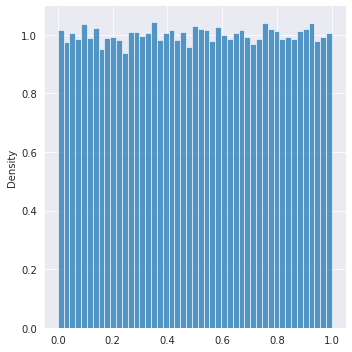

In [22]:
results = simulate(lambda:uniform(), 100000)

show_insights_continuous(results)

## Variable Aleatoria Discreta Finita

In [6]:
def finite_va(value_prob_pairs):
    value_probs_sorted = sorted(value_prob_pairs, key=lambda vp: vp[1], reverse=True)
    u = uniform()
    for v, p in value_probs_sorted:
        if u < p:
            return v
        else:
            u -= p


## Bernoulli

In [7]:
def bernoulli(p):
    return finite_va([(0, p), (1, 1-p)])

Expected Value: 0.4984
Variace: 0.24999743999999782
Standard Deviation: 0.4999974399934442


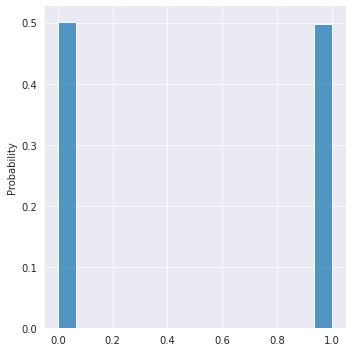

In [8]:
results = simulate(lambda: bernoulli(0.5), 10000)

show_insights_discrete(results)

## Binomial

In [9]:
def binomial(n, p):
    return sum(bernoulli(p) for _ in range(n))

Expected Value: 4.9925
Variace: 2.4768437499999325
Standard Deviation: 1.573799145380354


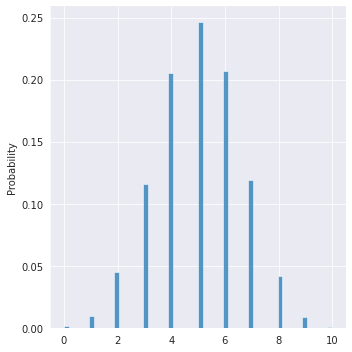

In [10]:
results = simulate(lambda: binomial(10, 0.5), 10000)

show_insights_discrete(results)

## Geometrica  

In [11]:
def geometric(p):
    k = 1
    while bernoulli(p) == 0:
        k += 1
    return k

Expected Value: 1.9868
Variace: 1.9574257599999156
Standard Deviation: 1.3990803265002034


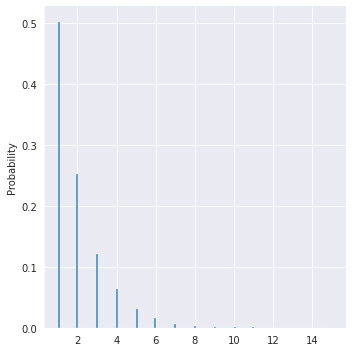

In [12]:
results = simulate(lambda: geometric(0.5), 10000)

show_insights_discrete(results)

In [13]:
import math

def geometric_improved(p):
    u = uniform()
    return math.log(u) // math.log(1-p) + 1

Expected Value: 2.0166
Variace: 2.0605244399999942
Standard Deviation: 1.4354526951453308


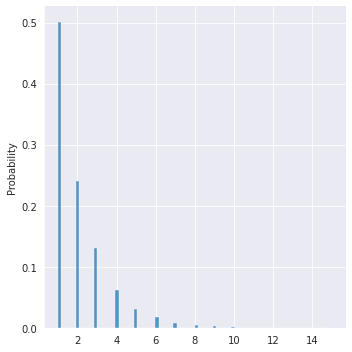

In [14]:
results = simulate(lambda: geometric_improved(0.5), 10000)

show_insights_discrete(results)

## Binomial Negativa

In [15]:
# geo = geometric
geo = geometric_improved

def negative_binomial(r, p):
    return sum(geo(p) for _ in range(r))

Expected Value: 19.9997
Variace: 19.416299909998518
Standard Deviation: 4.406393072570639


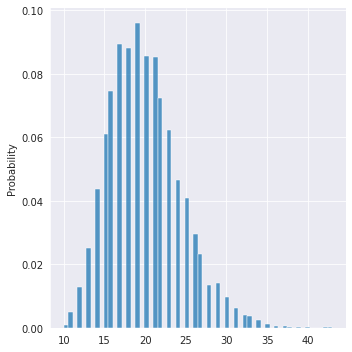

In [16]:
results = simulate(lambda: negative_binomial(10, 0.5), 10000)

show_insights_discrete(results)

## Exponencial

In [17]:
import math

def exponential(lambda_):
    return -1 * math.log(uniform()) / lambda_

Expected Value: 0.33662275796806473
Variace: 0.11511255543150885
Standard Deviation: 0.3392824124995412


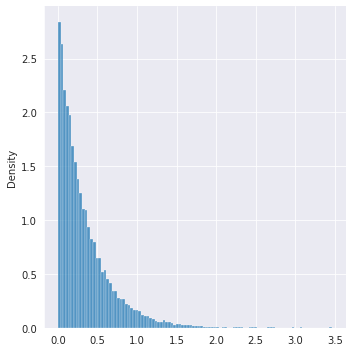

In [18]:
results = simulate(lambda: exponential(3), 10000)

show_insights_continuous(results)

## Normal

In [19]:
import math

def sign(p):
    return finite_va([(1, p), (-1, 1-p)])

def standard():
    while True:
        y = exponential(1)
        u = uniform()
        if u <= math.exp(-(y-1)*(y-1)/2):
            return sign(0.5) * y

def normal(mu, sigma_squared):
    return standard() * math.sqrt(sigma_squared) + mu

Expected Value: 0.004404331360985844
Variace: 0.9831846675145282
Standard Deviation: 0.9915566890070019


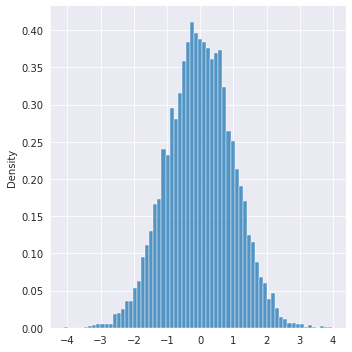

In [20]:
results = simulate(lambda: standard(), 10000)

show_insights_continuous(results)